## Decision Tree

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine  # 内置数据库
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.target # 目标向量 0-2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
wine.data # 矩阵

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
import pandas as pd # concat拼接data(矩阵)和target(向量)
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)],axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
names = wine.feature_names # Wine种类
names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
targets = wine.target_names # 标签名称
targets

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
targets

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
# 分成训练和测试集
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.3
                                                   , random_state = 1)

In [10]:
X_train.shape

(124, 13)

In [11]:
wine.data.shape

(178, 13)

### 模型

In [12]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')   #实例化模型
clf = clf.fit(X_train, y_train)     #训练模型
score = clf.score(X_test, y_test)   #得到模型的accuracy

In [13]:
#check score
score

0.9629629629629629

### 树

In [14]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names = names,
                                class_names = targets,
                               filled = True, rounded = True) #filled with color, rounded 获得边框围圆
graph = graphviz.Source(dot_data)

In [15]:
# 查看重要性 越大越重要
[*zip(names, clf.feature_importances_)]

[('alcohol', 0.057960870491628284),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.034247526308054214),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.4131024938753796),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.1730185294435484),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.32167057988138953)]

### splitter是用来控制决策树中的随机选项的，有两种值，输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要（按照不纯度设置的基尼系数或者信息熵的值）的特征进行分枝，输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。

In [16]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',
                                 random_state = 123, splitter = "random")   #实例化模型
clf = clf.fit(X_train, y_train)     
score = clf.score(X_test, y_test)   

In [17]:
score 

0.8888888888888888

#### 剪枝: max_depth, min_samples_leaf, min_samples_split

In [18]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',
                                random_state = 123, 
                                splitter = "random",
                                max_depth = 5,
                                min_samples_leaf = 3,
                                min_samples_split = 5
                                 )   #实例化模型
clf = clf.fit(X_train, y_train)     
score = clf.score(X_test, y_test)  
score

0.9074074074074074

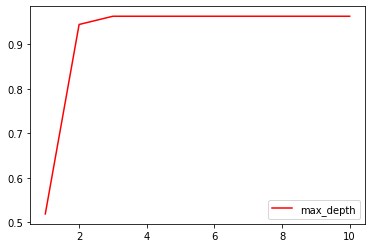

In [19]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1, criterion='entropy', random_state = 123)
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    test.append(score)
    
plt.plot(range(1,11), test, color='red',label='max_depth')
plt.legend()
plt.show()

### 接口

In [20]:
# apply返回每个测试样本所在的叶子节点的索引
clf.apply(X_test)

array([ 5, 11, 14,  2, 14,  5, 11, 14,  5,  8, 14, 11,  8, 14,  8,  8,  5,
       14,  8, 14, 14,  8,  5, 14, 14,  5, 14, 14, 14,  5,  8,  5,  5, 14,
        8,  8,  2,  8,  8, 14, 14,  2,  5, 14, 14, 14, 13, 14, 14, 14,  8,
        5,  5, 14], dtype=int64)

In [21]:
# predict返回每个测试样本的分类/回归结果
clf.predict(X_test)

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0])

## 随机森林 Random Forest

In [22]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### 基本的建模流程

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size = 0.3)

In [24]:
clf = DecisionTreeClassifier(random_state = 0) # 锁定训练数组
rfc = RandomForestClassifier(random_state = 0) # 固定一片森林（每棵树不同）

clf = clf.fit(Xtrain, ytrain)
rfc = rfc.fit(Xtrain, ytrain)

score_c = clf.score(Xtest, ytest)
score_f = rfc.score(Xtest, ytest)

In [25]:
print("Single Tree:{}".format(score_c),"Random Forest:{}".format(score_f))   
# 随机森林的效果通常都比决策树要好

Single Tree:0.9444444444444444 Random Forest:1.0


### 查看精确性并可视化

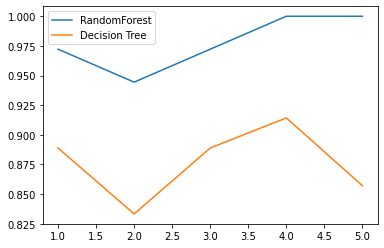

In [26]:
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=5)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=5)

plt.plot(range(1,6),rfc_s,label = "RandomForest")
plt.plot(range(1,6),clf_s,label = "Decision Tree") 
plt.legend()
plt.show()

随机森林的表现都在决策树之上，在进行十组交叉验证之后可以更加清楚的看出来两个表现。

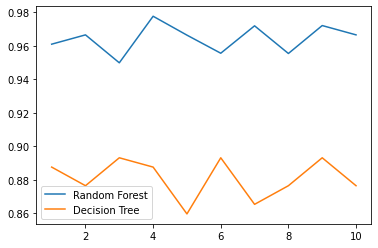

In [27]:
#进行十组交叉验证：
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=5).mean() 
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=5).mean() 
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest") 
plt.plot(range(1,11),clf_l,label = "Decision Tree") 
plt.legend()
plt.show()

### n_estimators的学习曲线

0.9777777777777779 16


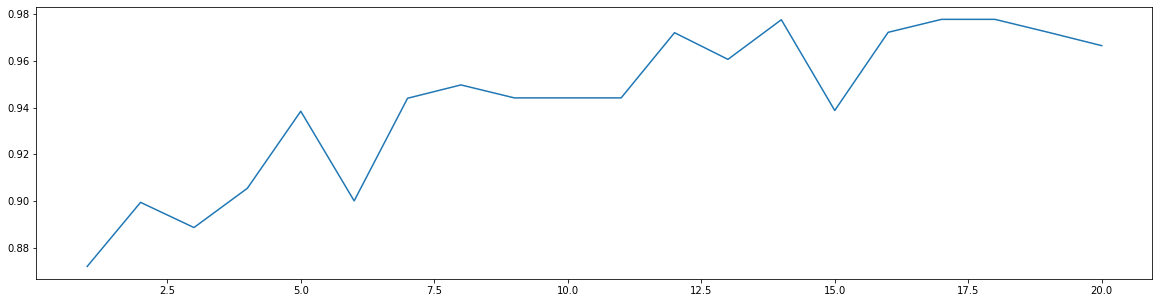

In [28]:
superpa = []

for i in range(20): 
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=5).mean() 
    superpa.append(rfc_s)

print(max(superpa),superpa.index(max(superpa))) 
plt.figure(figsize=[20,5]) 
plt.plot(range(1,21),superpa)
plt.show()

### 重要的属性和接口

In [29]:
rfc = RandomForestClassifier(n_estimators=25) 
rfc = rfc.fit(Xtrain, ytrain) 
rfc.score(Xtest,ytest)

rfc.feature_importances_ 
rfc.apply(Xtest) 
rfc.predict(Xtest)
rfc.predict_proba(Xtest)

array([[0.76, 0.2 , 0.04],
       [1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.04, 0.84, 0.12],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.88, 0.12, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.12, 0.88],
       [0.04, 0.88, 0.08],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.  , 0.96, 0.04],
       [0.  , 0.24, 0.76],
       [1.  , 0.  , 0.  ],
       [0.04, 0.04, 0.92],
       [0.48, 0.52, 0.  ],
       [0.2 , 0.8 , 0.  ],
       [0.04, 0.  , 0.96],
       [0.08, 0.  , 0.92],
       [0.08, 0.84, 0.08],
       [0.08, 0.48, 0.44],
       [0.  , 0.24, 0.76],
       [0.04, 0.72, 0.24],
       [0.04, 0.96, 0.  ],
       [0.04, 0.92, 0.04],
       [0.04, 0.88, 0.08],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.12, 0.88],
       [0.  , 1.  , 0.  ],
       [0.04, 0.72, 0.24],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.84, 0.12, 0.04],
 

### 乳腺癌数据调参
深度越深，模型越复杂。越小，模型拟合度不足。寻找适合的复杂度和枝叶，才能找到合适的复杂度。

推荐多用决策树的可视化，同时先限制决策树的深度（比如最多3层），这样可以先观察下生成的决策树里数据的初步拟合情况，然后再决定是否要增加深度。

当样本少数量但是样本特征非常多的时候，决策树很容易过拟合，一般来说，样本数比特征数多一些会比较容易建立健壮的模型

如果样本数量少但是样本特征非常多，在拟合决策树模型前，推荐先做维度规约，比如主成分分析（PCA），特征选择（Losso）或者独立成分分析（ICA）。这样特征的维度会大大减小。再来拟合决策树模型效果会好。

在训练模型先，注意观察样本的类别情况（主要指分类树），如果类别分布非常不均匀，就要考虑用class_weight来限制模型过于偏向样本多的类别。

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [32]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [33]:
#先建100个随机森林
rfc = RandomForestClassifier(n_estimators = 100, random_state = 123)
score_pre = cross_val_score(rfc, data.data, data.target, cv=5).mean() #cv5次
score_pre #没有调参之前数值已经达到96%

0.9631268436578171

### 先调n_estimators

0.9718987734823784 31


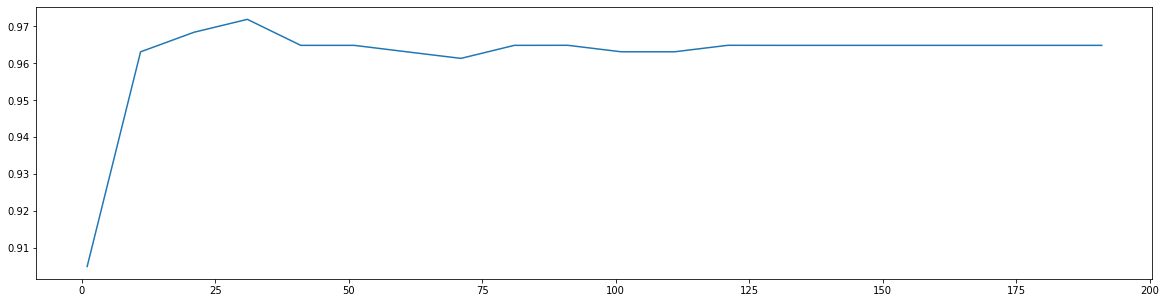

In [34]:
score1 = []
for i in range(0, 200, 10):#从0开始每10个数取一个
    rfc = RandomForestClassifier(n_estimators = i+1, n_jobs = -1, random_state = 123)
    score = cross_val_score(rfc, data.data, data.target, cv=5).mean()
    score1.append(score)
print(max(score1), (score1.index(max(score1))*10)+1) 
#x10是获得在range(0,200,10)这个数本身（此时不是索引了），+1 为n_estimators = i +1

plt.figure(figsize=[20,5])
plt.plot(range(1, 201, 10), score1)
plt.show()    

#### 细化曲线：已知在30左右能达到最好的效果，逐渐缩小范围

0.9736531594472908 30


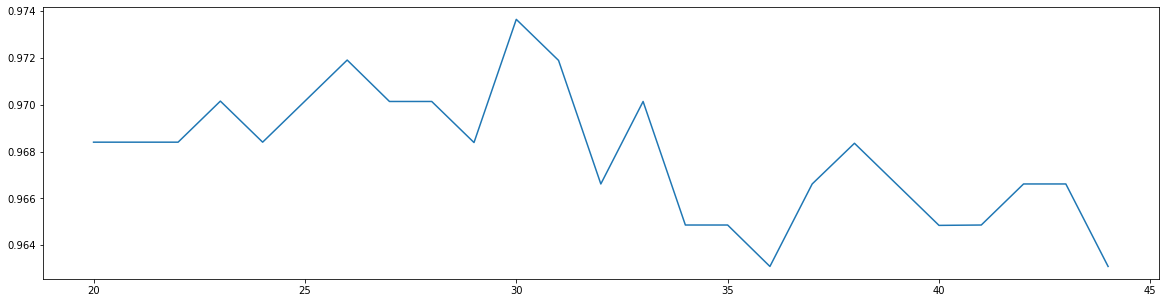

In [35]:
score2 = []
for i in range(20,45):
    rfc = RandomForestClassifier(n_estimators = i, n_jobs = -1, random_state = 123)
    score = cross_val_score(rfc, data.data, data.target, cv=5).mean()
    score2.append(score)
print(max(score2), ([*range(20,45)][score2.index(max(score2))]))

plt.figure(figsize = [20,5])
plt.plot(range(20,45),score2)
plt.show()

通过缩小范围发现，n_estimators=30时达到最好的效果，准确率为97.3%。

#### 使用复杂度-泛化误差对参数进行一个个的调整
网格调参（param_grid)的思想是利用学习曲线细化范围，然后选出适合的参数。首先要从影响程度最高的参数开始调整，首选max_depth：
- GridSearchCV(
    estimator,
    param_grid,
    scoring=None,
    n_jobs=None,
    iid='deprecated',
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)

### max_depth
- max_depth：  int or None, optional (default=None) 一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。常用来解决过拟合

In [36]:
param_grid = {'max_depth': np.arange(1, 20, 1)}

rfc = RandomForestClassifier(n_estimators = 35 ,random_state = 123)
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(data.data, data.target)

GS.best_params_

{'max_depth': 7}

In [37]:
GS.best_score_

0.9666200900481291

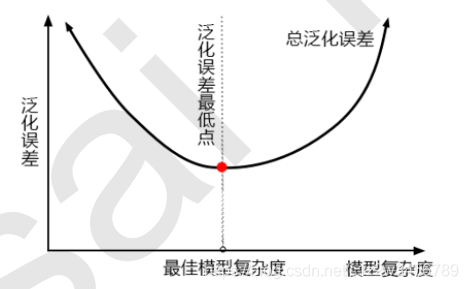

在我们设置max_depth之后，模型的准确性下降了。限制max_depth是让模型变得简单，而模型的整体准确率下降，即整体的泛化误差上升了，说明模型现在位于图像左边。说明树模型倾向与过拟合，而不是拟合不足。可能我们调整的n_estimators对于数据集来说太大，因此将模型拉向泛化误差低点。

当模型位于图像左边时，我们需要增加的是模型复杂度（增加方差，减少偏差）。因此max_depth应该尽可能取大，min_samples_leaf, min_samples_split都应该尽量小。这说明，除了max_features, 我们没有任何参数可以调整了。因为**max_depth, min_samples_leaf, and min_samples_split are purning, 是减小复杂度的参数**。

因此可以预言，模型可能已经达到上限，我们可以尝试调整一下max_features，看看模型如何变化。

### max_features
- max_features：None（所有），log2，sqrt，N  特征小于50的时候一般使用所有的

In [38]:
param_grid = {'max_features': np.arange(5, 30, 1)}
#增加模型的特征，特征越多，模型的复杂度就越高

rfc = RandomForestClassifier(n_estimators = 35, random_state = 123)

GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(data.data, data.target)

GS.best_params_

{'max_features': 7}

In [39]:
GS.best_score_

0.9719298245614034

此时当我们获得当模型有7个特征时，准确性获得逐步增加。如果是实例，当两个步骤后准确度都没有增加就可以停止了，这表明泛化误差已经达到了最低点，没有参数可以左右的部分了。如果希望更进一步，可以考虑更换算法。

###  min_samples_leaf
- min_samples_leaf： 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝，如果样本量不大，不需要管这个值，大些如10W可是尝试下

In [40]:
param_grid = {'min_samples_leaf': np.arange(1, 1+10, 1)}

#对于min_samples_leaf and min_samples_split，一般从他们的最小值开始向上增加10 到 20
#面对高维度高样本量数据，如果不放心，可以直接+50， 对于大型数据，可能需要200～300的范围
#如果调整的时候发现准确率无法提高，可以大胆的调一个很大的数据，大力限制模型的复杂度

rfc = RandomForestClassifier(n_estimators = 35, random_state = 123)

GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(data.data, data.target)

GS.best_params_

{'min_samples_leaf': 4}

In [41]:
GS.best_score_

0.9666356155876418

增加了min_samples_leaf是减少泛化误差的选项，准确率上升了

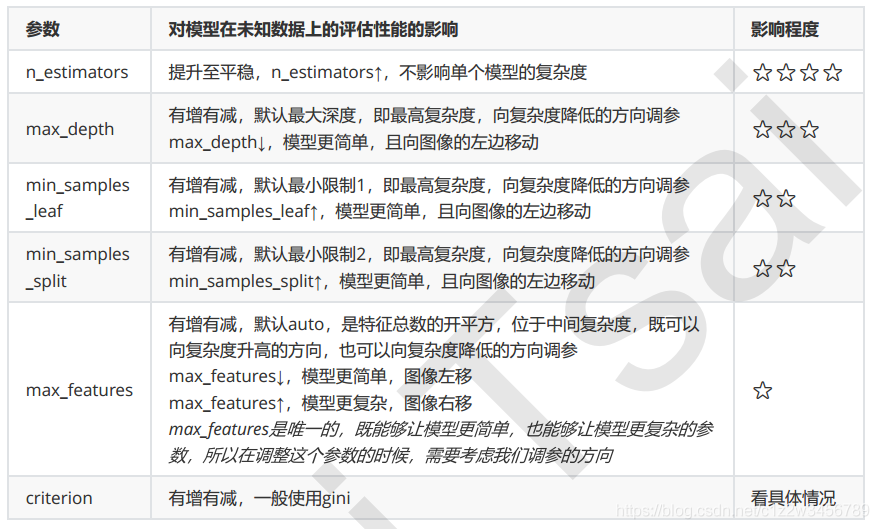

### 用于模型调参的参数：

1）criterion（划分标准）：有两个参数 'entropy'（熵） 和 'gini'（基尼系数）可选，默认为gini。

2）max_depth（树的最大深度）：默认为None，此时决策树在建立子树的时候不会限制子树的深度。也可以设置具体的整数，一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。

3）min_samples_split（分割内部节点所需的最小样本数）：意思就是只要在某个结点里有k个以上的样本，这个节点才需要继续划分，这个参数的默认值为2，也就是说只要有2个以上的样本被划分在一个节点，如果这两个样本还可以细分，这个节点就会继续细分

4）min_samples_leaf（叶子节点上的最小样本数）：当你划分给某个叶子节点的样本少于设定的个数时，这个叶子节点会被剪枝，这样可以去除一些明显异常的噪声数据。默认为1，也就是说只有有两个样本类别不一样，就会继续划分。如果是int，那么将min_samples_leaf视为最小数量。如果为float，则min_samples_leaf为分数，ceil(min _ samples _ leaf * n _ samples)为每个节点的最小样本数。